In [1]:
from qiskit import QuantumCircuit, Aer, assemble, execute, BasicAer, transpile
from qiskit_textbook.tools import array_to_latex
from qiskit.tools.visualization import plot_histogram
from qiskit_aer import Aer
import numpy as np
%matplotlib inline

C:\Users\rudra\AppData\Local\Temp\ipykernel_22332\2366082810.py:1: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import QuantumCircuit, Aer, assemble, execute, BasicAer, transpile


## Task 1

In [49]:
circuit = QuantumCircuit(2, 2)
circuit.h(1)

In [50]:
def swap_states(cir):
    cir.cx(0, 1)
    cir.cx(1, 0)
    cir.cx(0, 1)
    return cir

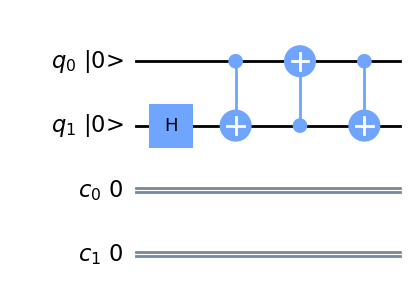

In [51]:
circuit = swap_states(circuit)
circuit.draw(initial_state=True, cregbundle=False, output='mpl')

In [52]:
simulator = Aer.get_backend('statevector_simulator')
qobj = transpile(circuit, simulator)
final_state = simulator.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext='\\text{Statevector} = ')

<IPython.core.display.Math object>

#### Measuring qubits using classical registers

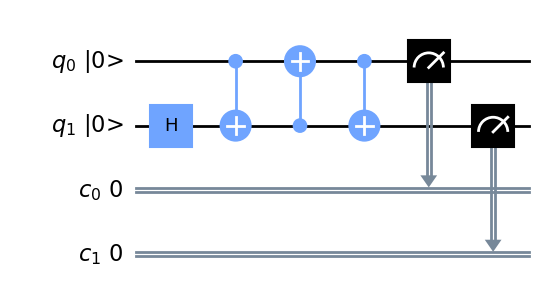

In [53]:
circuit.measure([0, 1], [0, 1])
circuit.draw(initial_state=True, cregbundle=False, output='mpl')

In [54]:
qobj2 = transpile(circuit, simulator)
measured_state = simulator.run(qobj2).result().get_statevector()
array_to_latex(measured_state, pretext='\\text{Vector} = ')

<IPython.core.display.Math object>

## Task 2

In [2]:
circuit2 = QuantumCircuit(2, 2)

In [3]:
def create_state(cir):
    cir.h(0)
    cir.cx(0, 1)
    cir.x(1)
    return cir

c:\Users\rudra\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


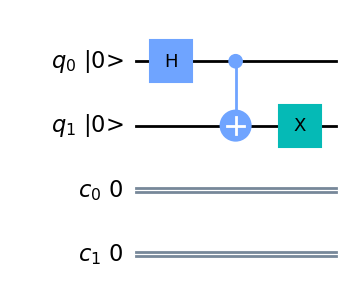

In [4]:
circuit2 = create_state(circuit2)
circuit2.draw(initial_state=True, cregbundle=False, output='mpl')

In [5]:
simulator2 = Aer.get_backend('statevector_simulator')
qobj2 = transpile(circuit2, simulator2)
final_state2 = simulator2.run(qobj2).result().get_statevector()
array_to_latex(final_state2, pretext='\\text{Statevector} = ')

<IPython.core.display.Math object>

In [6]:
circuit2.cx(1, 0)
qobj2 = transpile(circuit2, simulator2)
final_state2 = simulator2.run(qobj2).result().get_statevector()
array_to_latex(final_state2, pretext='\\text{Statevector} = ')

<IPython.core.display.Math object>

The final state is not entangled anymore

In [12]:
circuit2.measure([0, 1], [0, 1])
circuit2.draw(initial_state=True, cregbundle=False, output='mpl')
qobj2 = transpile(circuit2, simulator2)
final_state2 = simulator2.run(qobj2).result().get_statevector()
array_to_latex(final_state2, pretext='\\text{Statevector} = ')

<IPython.core.display.Math object>

{'01': 49, '11': 51}


C:\Users\rudra\AppData\Local\Temp\ipykernel_22332\1295576266.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit2, backend = simulator, shots=100)


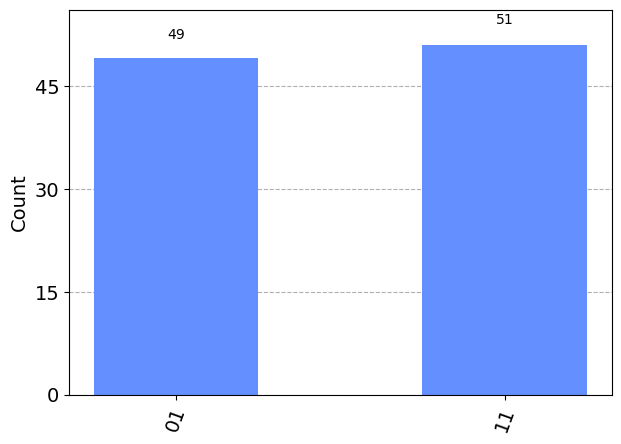

In [15]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit2, backend = simulator, shots=100)
result = job.result()
counts = result.get_counts(circuit2)
print(counts)
plot_histogram(counts)


## Task 3

In [32]:
circuit3 = QuantumCircuit(3)

In [33]:
def create_circuit(cir):
    cir.cx(0, 1)
    cir.x(1)
    cir.cx(1, 2)
    cir.x(1)
    cir.cx(0, 1)
    return cir

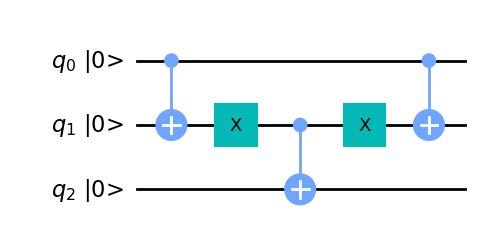

In [34]:
circuit3 = create_circuit(circuit3)
circuit3.draw(initial_state=True, cregbundle=False, output='mpl')

Getting the circuit as a unitary matrix

In [36]:
simulator = Aer.get_backend('unitary_simulator')
job = execute(circuit3, backend=simulator)
result = job.result()
print(result.get_unitary(circuit3, decimals=2))

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


C:\Users\rudra\AppData\Local\Temp\ipykernel_22332\1621226146.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit3, backend=simulator)
